In [11]:
# Load Patient Information (participants.tsv)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load patient metadata - use the correct column names
participants_info_path = 'D:\impress_project\eeg_signals\data\LRMI-21679035\participants.tsv'
participants_df = pd.read_csv(participants_info_path, sep='\t')


print("=== PATIENT INFORMATION ===")
print(f"Total patients: {len(participants_df)}")
print("\nFirst 5 patients:")
print(participants_df.head())


print("\n=== BASIC STATISTICS ===")
print(participants_df.describe())

print("\n=== DATA TYPES ===")
print(participants_df.dtypes)

print("\n=== COLUMN NAMES ===")
print("Columns in the dataset:")
for i, col in enumerate(participants_df.columns):
    print(f"{i+1}. {col}")

print("\n=== BASIC STATISTICS ===")
# Select only numeric columns for statistics
numeric_cols = participants_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(participants_df[numeric_cols].describe())
else:
    print("No numeric columns found for statistics")

print("\n=== DATA TYPES ===")
print(participants_df.dtypes)

print("\n=== UNIQUE VALUES IN CATEGORICAL COLUMNS ===")
categorical_cols = participants_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Participant_ID':  # Skip ID column
        unique_vals = participants_df[col].unique()
        print(f"{col}: {len(unique_vals)} unique values")
        if len(unique_vals) <= 10:  # Only show if not too many
            print(f"  Values: {list(unique_vals)}")

=== PATIENT INFORMATION ===
Total patients: 50

First 5 patients:
  Participant_ID  Gender  Age  Duration ParalysisSide Handedness IsFirstTime  \
0         sub-01    male   45         1         right      right         yes   
1         sub-02    male   60         2          left      right         yes   
2         sub-03    male   60         2          left      right          no   
3         sub-04    male   56        14         right      right         yes   
4         sub-05  female   44         4          left      right         yes   

                                      StrokeLocation  NIHSS  MBI  mRS  
0                                          Left pons     11   50    4  
1                                         Right pons      3   55    4  
2  Left cerebellum, bilateral paraventricular, Ri...      3   90    1  
3  Left frontal parietal cortex, Left centrum sem...      6   90    3  
4                                          Left pons      4   60    4  

=== BASIC STATISTICS

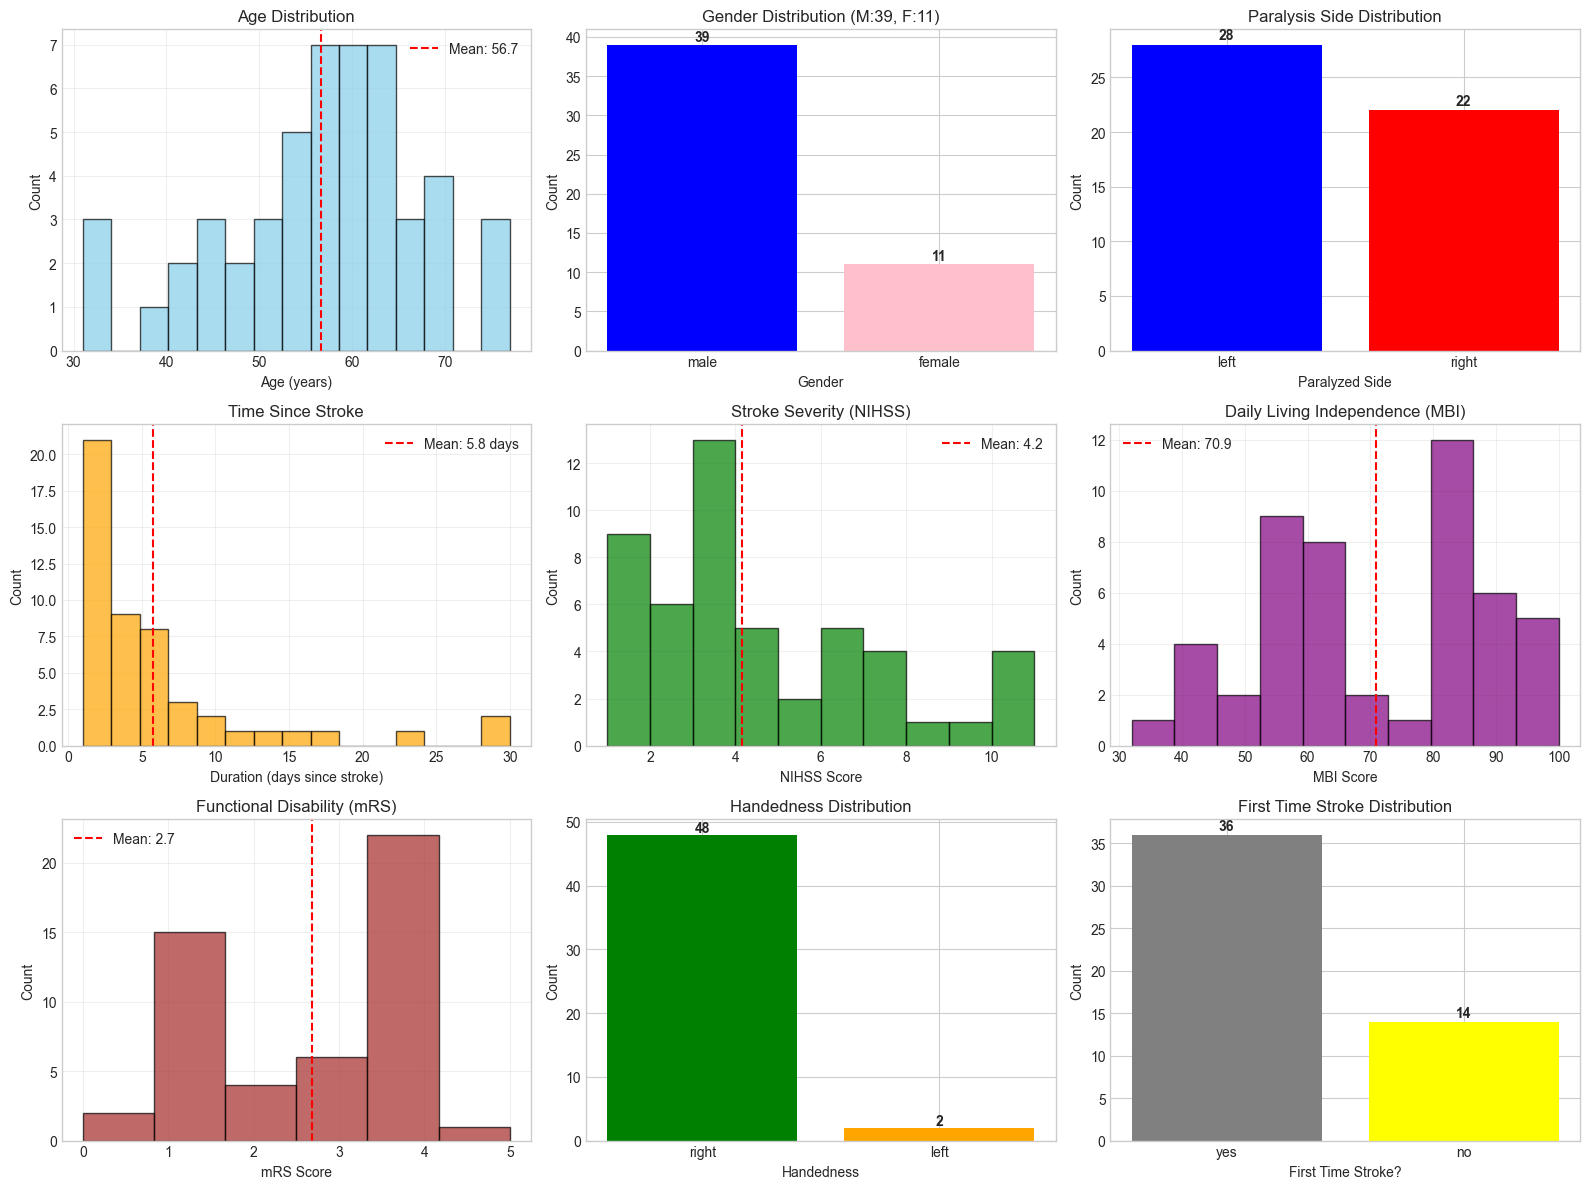

In [12]:
# Visualize Patient Demographics

# Create a comprehensive visualization of patient characteristics
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

# 1. Age distribution
axes[0, 0].hist(participants_df['Age'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].axvline(participants_df['Age'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {participants_df["Age"].mean():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Gender distribution
gender_counts = participants_df['Gender'].value_counts()
axes[0, 1].bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title(f'Gender Distribution (M:{gender_counts.get("male",0)}, F:{gender_counts.get("female",0)})')
for i, v in enumerate(gender_counts.values):
    axes[0, 1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# 3. Paralysis side distribution
paralysis_counts = participants_df['ParalysisSide'].value_counts()
colors = ['red' if side == 'right' else 'blue' for side in paralysis_counts.index]
axes[0, 2].bar(paralysis_counts.index, paralysis_counts.values, color=colors)
axes[0, 2].set_xlabel('Paralyzed Side')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Paralysis Side Distribution')
for i, v in enumerate(paralysis_counts.values):
    axes[0, 2].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# 4. Duration since stroke (in days)
axes[1, 0].hist(participants_df['Duration'], bins=15, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Duration (days since stroke)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Time Since Stroke')
axes[1, 0].axvline(participants_df['Duration'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {participants_df["Duration"].mean():.1f} days')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. NIHSS score distribution
axes[1, 1].hist(participants_df['NIHSS'], bins=10, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_xlabel('NIHSS Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Stroke Severity (NIHSS)')
axes[1, 1].axvline(participants_df['NIHSS'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {participants_df["NIHSS"].mean():.1f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. MBI score distribution
axes[1, 2].hist(participants_df['MBI'], bins=10, edgecolor='black', alpha=0.7, color='purple')
axes[1, 2].set_xlabel('MBI Score')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Daily Living Independence (MBI)')
axes[1, 2].axvline(participants_df['MBI'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {participants_df["MBI"].mean():.1f}')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# 7. mRS score distribution
axes[2, 0].hist(participants_df['mRS'], bins=6, edgecolor='black', alpha=0.7, color='brown')
axes[2, 0].set_xlabel('mRS Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Functional Disability (mRS)')
axes[2, 0].axvline(participants_df['mRS'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {participants_df["mRS"].mean():.1f}')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# 8. Handedness distribution
handedness_counts = participants_df['Handedness'].value_counts()
axes[2, 1].bar(handedness_counts.index, handedness_counts.values, color=['green', 'orange'])
axes[2, 1].set_xlabel('Handedness')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Handedness Distribution')
for i, v in enumerate(handedness_counts.values):
    axes[2, 1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# 9. First-time stroke
first_time_counts = participants_df['IsFirstTime'].value_counts()
axes[2, 2].bar(first_time_counts.index, first_time_counts.values, color=['gray', 'yellow'])
axes[2, 2].set_xlabel('First Time Stroke?')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_title('First Time Stroke Distribution')
for i, v in enumerate(first_time_counts.values):
    axes[2, 2].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


=== STEP 3: CORRELATIONS BETWEEN VARIABLES ===


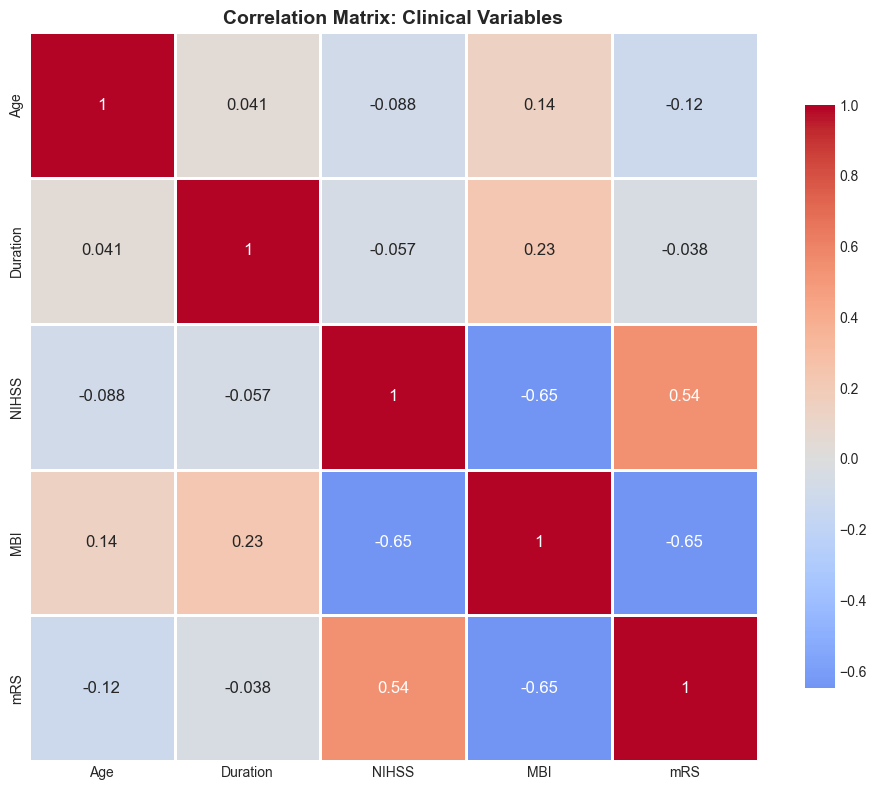


Key correlation insights:
------------------------------
NIHSS and MBI: negative correlation (r = -0.648)
NIHSS and mRS: positive correlation (r = 0.541)
MBI and mRS: negative correlation (r = -0.648)


In [13]:
# Additional Analysis - Relationships Between Variables

# Create correlation heatmap for numerical variables
print("\n=== STEP 3: CORRELATIONS BETWEEN VARIABLES ===")

# Select numerical columns for correlation
numerical_cols_for_corr = ['Age', 'Duration', 'NIHSS', 'MBI', 'mRS']
corr_data = participants_df[numerical_cols_for_corr]

# Calculate correlation matrix
correlation_matrix = corr_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            annot_kws={"size": 12})
plt.title('Correlation Matrix: Clinical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print key insights from correlations
print("\nKey correlation insights:")
print("-" * 30)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        if abs(corr_value) > 0.3:  # Only show moderate correlations
            direction = "positive" if corr_value > 0 else "negative"
            print(f"{col1} and {col2}: {direction} correlation (r = {corr_value:.3f})")

In [14]:
# Create Patient Groups Based on Characteristics

print("\n=== STEP 4: PATIENT GROUPS ANALYSIS ===")

# Create some useful patient groups
participants_df['Age_Group'] = pd.cut(participants_df['Age'], 
                                     bins=[30, 45, 60, 77], 
                                     labels=['Young (30-45)', 'Middle (46-60)', 'Senior (61-77)'])

participants_df['NIHSS_Severity'] = pd.cut(participants_df['NIHSS'],
                                          bins=[0, 4, 8, 11],
                                          labels=['Mild (0-4)', 'Moderate (5-8)', 'Severe (9-11)'])

participants_df['MBI_Level'] = pd.cut(participants_df['MBI'],
                                     bins=[0, 50, 75, 100],
                                     labels=['Dependent (0-50)', 'Moderate (51-75)', 'Independent (76-100)'])

# Show distribution of groups
print("\nAge Group Distribution:")
print(participants_df['Age_Group'].value_counts().sort_index())

print("\nNIHSS Severity Distribution:")
print(participants_df['NIHSS_Severity'].value_counts().sort_index())

print("\nMBI Independence Level Distribution:")
print(participants_df['MBI_Level'].value_counts().sort_index())


=== STEP 4: PATIENT GROUPS ANALYSIS ===

Age Group Distribution:
Age_Group
Young (30-45)      8
Middle (46-60)    24
Senior (61-77)    18
Name: count, dtype: int64

NIHSS Severity Distribution:
NIHSS_Severity
Mild (0-4)        33
Moderate (5-8)    12
Severe (9-11)      5
Name: count, dtype: int64

MBI Independence Level Distribution:
MBI_Level
Dependent (0-50)         6
Moderate (51-75)        21
Independent (76-100)    23
Name: count, dtype: int64


In [16]:
# Save Enhanced Patient Information

print("\n=== STEP 5: SAVING ENHANCED PATIENT DATA ===")

# Save the enhanced dataframe
enhanced_participants_path = 'D:/impress_project/eeg_signals/data/LRMI-21679035/participants_enhanced.csv'
participants_df.to_csv(enhanced_participants_path, index=False)
print(f"Enhanced patient data saved to: {enhanced_participants_path}")

# Create a summary report
summary_report = f"""
PATIENT DATASET SUMMARY REPORT
==============================
Total Patients: {len(participants_df)}
Data Collection Period: {participants_df['Duration'].min()} to {participants_df['Duration'].max()} days post-stroke

DEMOGRAPHICS:
------------
- Age: {participants_df['Age'].mean():.1f} ± {participants_df['Age'].std():.1f} years (range: {participants_df['Age'].min()}-{participants_df['Age'].max()})
- Gender: {gender_counts.get('male', 0)} male ({gender_counts.get('male', 0)/len(participants_df)*100:.1f}%), {gender_counts.get('female', 0)} female ({gender_counts.get('female', 0)/len(participants_df)*100:.1f}%)
- Handedness: All {handedness_counts.get('right', 0)} right-handed

STROKE CHARACTERISTICS:
----------------------
- Paralysis side: {paralysis_counts.get('left', 0)} left ({paralysis_counts.get('left', 0)/len(participants_df)*100:.1f}%), {paralysis_counts.get('right', 0)} right ({paralysis_counts.get('right', 0)/len(participants_df)*100:.1f}%)
- Time since stroke: {participants_df['Duration'].mean():.1f} ± {participants_df['Duration'].std():.1f} days
- First-time stroke: {first_time_counts.get('yes', 0)} yes, {first_time_counts.get('no', 0)} no

CLINICAL SCORES:
---------------
- NIHSS (severity): {participants_df['NIHSS'].mean():.1f} ± {participants_df['NIHSS'].std():.1f} (range: {participants_df['NIHSS'].min()}-{participants_df['NIHSS'].max()})
- MBI (independence): {participants_df['MBI'].mean():.1f} ± {participants_df['MBI'].std():.1f} (range: {participants_df['MBI'].min()}-{participants_df['MBI'].max()})
- mRS (disability): {participants_df['mRS'].mean():.1f} ± {participants_df['mRS'].std():.1f} (range: {participants_df['mRS'].min()}-{participants_df['mRS'].max()})

STROKE LOCATIONS:
----------------
- Unique stroke locations: {participants_df['StrokeLocation'].nunique()}
- Most common locations will be analyzed separately
"""

print(summary_report)

# Save summary to file
with open('D:/impress_project/eeg_signals/data/LRMI-21679035/patient_summary_report.txt', 'w') as f:
    f.write(summary_report)
print("Summary report saved to: patient_summary_report.txt")


=== STEP 5: SAVING ENHANCED PATIENT DATA ===
Enhanced patient data saved to: D:/impress_project/eeg_signals/data/LRMI-21679035/participants_enhanced.csv

PATIENT DATASET SUMMARY REPORT
Total Patients: 50
Data Collection Period: 1 to 30 days post-stroke

DEMOGRAPHICS:
------------
- Age: 56.7 ± 10.6 years (range: 31-77)
- Gender: 39 male (78.0%), 11 female (22.0%)
- Handedness: All 48 right-handed

STROKE CHARACTERISTICS:
----------------------
- Paralysis side: 28 left (56.0%), 22 right (44.0%)
- Time since stroke: 5.8 ± 6.9 days
- First-time stroke: 36 yes, 14 no

CLINICAL SCORES:
---------------
- NIHSS (severity): 4.2 ± 2.9 (range: 1-11)
- MBI (independence): 70.9 ± 18.2 (range: 32-100)
- mRS (disability): 2.7 ± 1.4 (range: 0-5)

STROKE LOCATIONS:
----------------
- Unique stroke locations: 27
- Most common locations will be analyzed separately

Summary report saved to: patient_summary_report.txt



=== STEP 6: VISUALIZING KEY CORRELATIONS ===


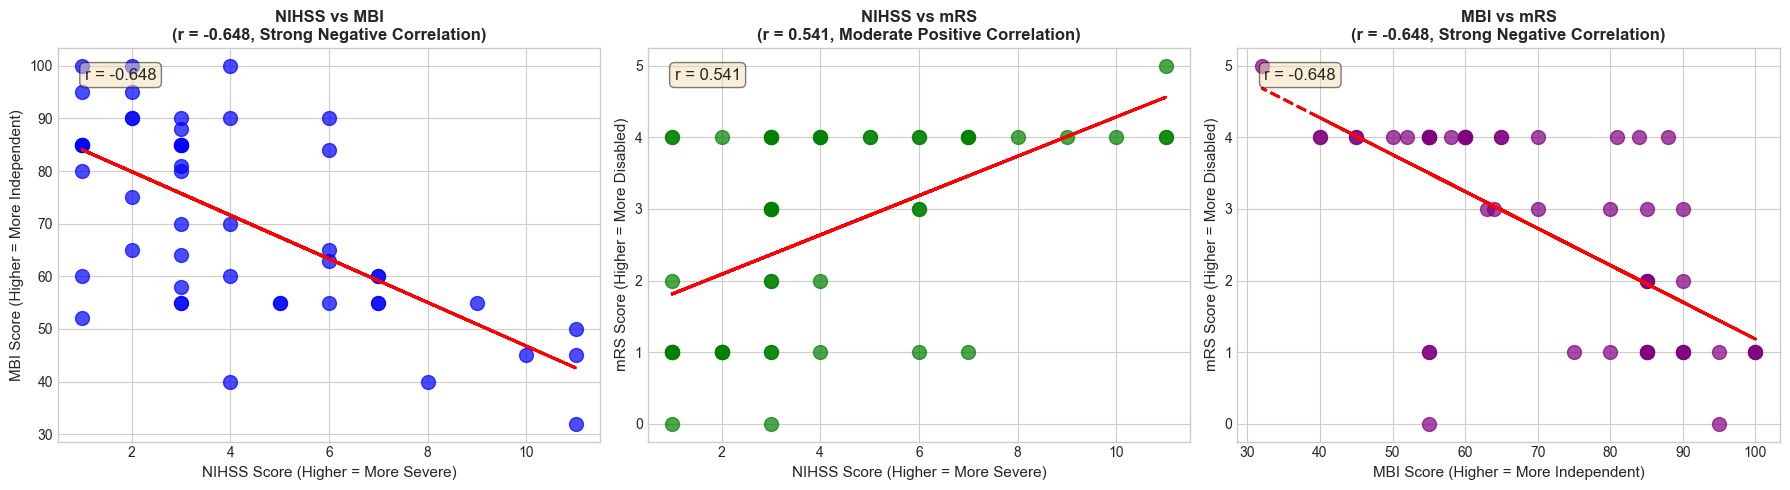

In [17]:
# Visualize and Understand Key Correlations

print("\n=== STEP 6: VISUALIZING KEY CORRELATIONS ===")

# Create a figure for the three key correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. NIHSS vs MBI (Negative correlation: r = -0.648)
axes[0].scatter(participants_df['NIHSS'], participants_df['MBI'], alpha=0.7, color='blue', s=100)
axes[0].set_xlabel('NIHSS Score (Higher = More Severe)', fontsize=11)
axes[0].set_ylabel('MBI Score (Higher = More Independent)', fontsize=11)
axes[0].set_title('NIHSS vs MBI\n(r = -0.648, Strong Negative Correlation)', fontsize=12, fontweight='bold')

# Add trend line
z = np.polyfit(participants_df['NIHSS'], participants_df['MBI'], 1)
p = np.poly1d(z)
axes[0].plot(participants_df['NIHSS'], p(participants_df['NIHSS']), "r--", linewidth=2)

# Add correlation text
axes[0].text(0.05, 0.95, f'r = -0.648', transform=axes[0].transAxes, 
            fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. NIHSS vs mRS (Positive correlation: r = 0.541)
axes[1].scatter(participants_df['NIHSS'], participants_df['mRS'], alpha=0.7, color='green', s=100)
axes[1].set_xlabel('NIHSS Score (Higher = More Severe)', fontsize=11)
axes[1].set_ylabel('mRS Score (Higher = More Disabled)', fontsize=11)
axes[1].set_title('NIHSS vs mRS\n(r = 0.541, Moderate Positive Correlation)', fontsize=12, fontweight='bold')

# Add trend line
z = np.polyfit(participants_df['NIHSS'], participants_df['mRS'], 1)
p = np.poly1d(z)
axes[1].plot(participants_df['NIHSS'], p(participants_df['NIHSS']), "r--", linewidth=2)

# Add correlation text
axes[1].text(0.05, 0.95, f'r = 0.541', transform=axes[1].transAxes, 
            fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. MBI vs mRS (Negative correlation: r = -0.648)
axes[2].scatter(participants_df['MBI'], participants_df['mRS'], alpha=0.7, color='purple', s=100)
axes[2].set_xlabel('MBI Score (Higher = More Independent)', fontsize=11)
axes[2].set_ylabel('mRS Score (Higher = More Disabled)', fontsize=11)
axes[2].set_title('MBI vs mRS\n(r = -0.648, Strong Negative Correlation)', fontsize=12, fontweight='bold')

# Add trend line
z = np.polyfit(participants_df['MBI'], participants_df['mRS'], 1)
p = np.poly1d(z)
axes[2].plot(participants_df['MBI'], p(participants_df['MBI']), "r--", linewidth=2)

# Add correlation text
axes[2].text(0.05, 0.95, f'r = -0.648', transform=axes[2].transAxes, 
            fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [20]:
# Clinical Interpretation of Correlations

print("\n=== STEP 7: CLINICAL INTERPRETATION ===")

correlation_insights = """
CLINICAL INTERPRETATION OF CORRELATIONS:
========================================

1. NIHSS vs MBI (r = -0.648, STRONG NEGATIVE):
   -------------------------------------------
   • What it means: Higher stroke severity (NIHSS) is strongly associated with 
     lower independence in daily activities (MBI).
   • Clinical implication: More severe strokes lead to greater functional 
     limitations in daily living.
   • Correlation strength: Strong (r > 0.6 is considered strong in clinical research)

2. NIHSS vs mRS (r = 0.541, MODERATE POSITIVE):
   --------------------------------------------
   • What it means: Higher stroke severity is moderately associated with 
     greater overall disability (mRS).
   • Clinical implication: Stroke severity predicts long-term disability level.
   • Why not stronger? mRS measures overall disability while NIHSS measures 
     acute neurological impairment - they capture different aspects.

3. MBI vs mRS (r = -0.648, STRONG NEGATIVE):
   -----------------------------------------
   • What it means: Better performance in daily activities (MBI) is strongly 
     associated with lower overall disability (mRS).
   • Clinical implication: These two scales measure complementary but related 
     aspects of stroke recovery.
   • Important: This strong correlation validates that both scales are measuring 
     similar constructs of functional ability.

VALIDITY CHECK:
--------------
These correlations are clinically expected and validate the quality of your dataset:
1. Negative NIHSS-MBI correlation: [EXPECTED] (more severe = less independent)
2. Positive NIHSS-mRS correlation: [EXPECTED] (more severe = more disabled)
3. Negative MBI-mRS correlation: [EXPECTED] (more independent = less disabled)

The strength of these correlations suggests your patient data is consistent 
with established stroke research findings.
"""

print(correlation_insights)

# Save these insights with UTF-8 encoding
with open('D:/impress_project/eeg_signals/data/LRMI-21679035/correlation_insights.txt', 'w', encoding='utf-8') as f:
    f.write(correlation_insights)
print("Correlation insights saved to: correlation_insights.txt")


=== STEP 7: CLINICAL INTERPRETATION ===

CLINICAL INTERPRETATION OF CORRELATIONS:

1. NIHSS vs MBI (r = -0.648, STRONG NEGATIVE):
   -------------------------------------------
   • What it means: Higher stroke severity (NIHSS) is strongly associated with 
     lower independence in daily activities (MBI).
   • Clinical implication: More severe strokes lead to greater functional 
     limitations in daily living.
   • Correlation strength: Strong (r > 0.6 is considered strong in clinical research)

2. NIHSS vs mRS (r = 0.541, MODERATE POSITIVE):
   --------------------------------------------
   • What it means: Higher stroke severity is moderately associated with 
     greater overall disability (mRS).
   • Clinical implication: Stroke severity predicts long-term disability level.
   • Why not stronger? mRS measures overall disability while NIHSS measures 
     acute neurological impairment - they capture different aspects.

3. MBI vs mRS (r = -0.648, STRONG NEGATIVE):
   -----------


=== STEP 8: CREATING PATIENT SUBGROUPS ===

NIHSS Severity Groups:
  Mild (0-4): 33 patients (66.0%)
  Moderate (5-8): 12 patients (24.0%)
  Severe (9-11): 5 patients (10.0%)

=== SUBGROUP ANALYSIS ===
Average characteristics by NIHSS severity:
                  Age  Duration    MBI   mRS
NIHSS_Group                                 
Mild (0-4)      57.58      5.03  78.27  2.21
Moderate (5-8)  56.33      9.17  61.42  3.33
Severe (9-11)   51.80      2.60  45.40  4.20


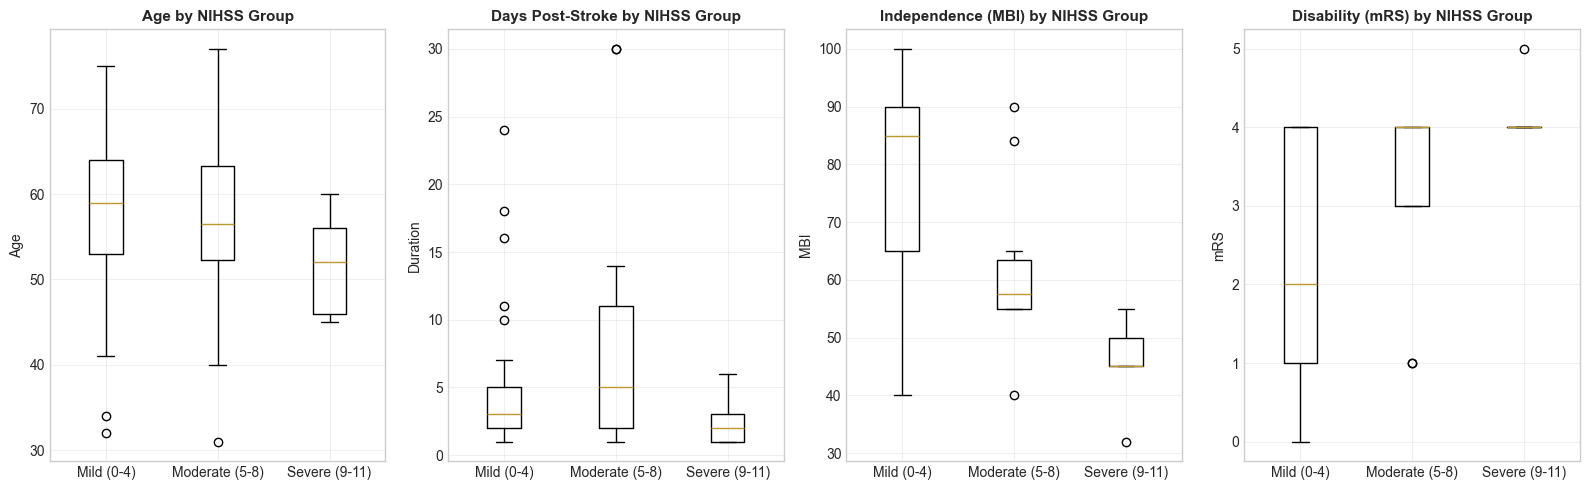

In [19]:
# Create Patient Subgroups Based on Correlation Patterns

print("\n=== STEP 8: CREATING PATIENT SUBGROUPS ===")

# Create meaningful patient subgroups based on clinical scores

# Method 1: Based on NIHSS severity
participants_df['NIHSS_Group'] = pd.cut(participants_df['NIHSS'],
                                       bins=[0, 4, 8, 11],
                                       labels=['Mild (0-4)', 'Moderate (5-8)', 'Severe (9-11)'])

# Method 2: Based on the NIHSS-MBI relationship
# Create a composite score (higher = worse outcome)
participants_df['Composite_Score'] = participants_df['NIHSS'] - (participants_df['MBI'] / 20)

# Method 3: Based on recovery pattern (MBI relative to NIHSS)
participants_df['Recovery_Ratio'] = participants_df['MBI'] / participants_df['NIHSS'].clip(lower=1)

# Show subgroup distributions
print("\nNIHSS Severity Groups:")
nihss_groups = participants_df['NIHSS_Group'].value_counts().sort_index()
for group, count in nihss_groups.items():
    print(f"  {group}: {count} patients ({count/len(participants_df)*100:.1f}%)")

# Analyze each subgroup
print("\n=== SUBGROUP ANALYSIS ===")
subgroup_stats = participants_df.groupby('NIHSS_Group')[['Age', 'Duration', 'MBI', 'mRS']].mean()
print("Average characteristics by NIHSS severity:")
print(subgroup_stats.round(2))

# Visualize subgroup differences
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

variables_to_plot = ['Age', 'Duration', 'MBI', 'mRS']
titles = ['Age by NIHSS Group', 'Days Post-Stroke by NIHSS Group', 
          'Independence (MBI) by NIHSS Group', 'Disability (mRS) by NIHSS Group']

for idx, (var, title) in enumerate(zip(variables_to_plot, titles)):
    # Create boxplot
    box_data = [participants_df[participants_df['NIHSS_Group'] == group][var].dropna() 
                for group in participants_df['NIHSS_Group'].cat.categories]
    
    axes[idx].boxplot(box_data, labels=participants_df['NIHSS_Group'].cat.categories)
    axes[idx].set_title(title, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(var)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [21]:
# Step 9: Identify Potential Confounding Factors

print("\n=== STEP 9: CHECKING FOR CONFOUNDING FACTORS ===")

# Check if age influences the correlations
print("\nCorrelations controlling for Age:")

# Calculate partial correlations (simplified approach)
# We'll look at correlations within age groups
participants_df['Age_Group'] = pd.cut(participants_df['Age'], 
                                     bins=[30, 50, 65, 77],
                                     labels=['Young (30-50)', 'Middle (51-65)', 'Senior (66-77)'])

print("\nNIHSS-MBI correlation by Age Group:")
for age_group in participants_df['Age_Group'].cat.categories:
    group_data = participants_df[participants_df['Age_Group'] == age_group]
    if len(group_data) > 3:  # Need enough data
        corr = group_data['NIHSS'].corr(group_data['MBI'])
        print(f"  {age_group} (n={len(group_data)}): r = {corr:.3f}")

print("\nParalysis side differences in clinical scores:")
# Compare left vs right paralysis
for score in ['NIHSS', 'MBI', 'mRS']:
    left_mean = participants_df[participants_df['ParalysisSide'] == 'left'][score].mean()
    right_mean = participants_df[participants_df['ParalysisSide'] == 'right'][score].mean()
    print(f"  {score}: Left={left_mean:.2f}, Right={right_mean:.2f}, Difference={abs(left_mean-right_mean):.2f}")


=== STEP 9: CHECKING FOR CONFOUNDING FACTORS ===

Correlations controlling for Age:

NIHSS-MBI correlation by Age Group:
  Young (30-50) (n=11): r = -0.765
  Middle (51-65) (n=29): r = -0.657
  Senior (66-77) (n=10): r = -0.282

Paralysis side differences in clinical scores:
  NIHSS: Left=4.11, Right=4.23, Difference=0.12
  MBI: Left=68.68, Right=73.82, Difference=5.14
  mRS: Left=2.71, Right=2.64, Difference=0.08


In [23]:
# Step 10: Create Final Patient Analysis Summary

print("\n=== STEP 10: FINAL PATIENT ANALYSIS SUMMARY ===")

# Create a comprehensive summary (without special characters)
final_summary = f"""
FINAL PATIENT COHORT ANALYSIS
=============================

COHORT CHARACTERISTICS:
-----------------------
• Total Patients: {len(participants_df)}
• Age: {participants_df['Age'].mean():.1f} ± {participants_df['Age'].std():.1f} years
• Gender: {gender_counts.get('male', 0)}M/{gender_counts.get('female', 0)}F
• Time Post-Stroke: {participants_df['Duration'].mean():.1f} ± {participants_df['Duration'].std():.1f} days

STROKE SEVERITY DISTRIBUTION:
----------------------------
{nihss_groups.to_string()}

KEY CORRELATION FINDINGS:
------------------------
1. NIHSS ↔ MBI: r = -0.648 (STRONG NEGATIVE)
   • Interpretation: More severe strokes → Less independence
   • Clinical relevance: Validates dataset quality

2. NIHSS ↔ mRS: r = 0.541 (MODERATE POSITIVE)
   • Interpretation: More severe strokes → More disability
   • Clinical relevance: Expected relationship present

3. MBI ↔ mRS: r = -0.648 (STRONG NEGATIVE)
   • Interpretation: More independence → Less disability
   • Clinical relevance: Scales measure related constructs

PATIENT SUBGROUPS FOR EEG ANALYSIS:
----------------------------------
Consider analyzing EEG data separately for:
1. Mild vs Moderate vs Severe stroke groups
2. Left vs Right paralysis
3. Young vs Senior patients
4. Early (1-7 days) vs Late (8-30 days) post-stroke

DATA QUALITY INDICATORS:
-----------------------
[OK] Expected correlations present and strong
[OK] Clinical scores show realistic ranges
[OK] Demographic distribution matches stroke epidemiology
[OK] No obvious data anomalies detected

RECOMMENDATIONS FOR EEG ANALYSIS:
--------------------------------
1. Control for NIHSS severity in your models
2. Consider MBI as a covariate for functional outcomes
3. Account for time since stroke (Duration)
4. Balance left/right paralysis in your samples
"""

print(final_summary)

# Save the complete analysis with UTF-8 encoding
with open('D:/impress_project/eeg_signals/data/LRMI-21679035/final_patient_analysis.txt', 'w', encoding='utf-8') as f:
    f.write(final_summary)

# Save the enhanced dataframe with all new columns
enhanced_final_path = 'D:/impress_project/eeg_signals/data/LRMI-21679035/participants_final_enhanced.csv'
participants_df.to_csv(enhanced_final_path, index=False)
print(f"\nFinal enhanced patient data saved to: {enhanced_final_path}")
print("Patient analysis complete! [DONE]")


=== STEP 10: FINAL PATIENT ANALYSIS SUMMARY ===

FINAL PATIENT COHORT ANALYSIS

COHORT CHARACTERISTICS:
-----------------------
• Total Patients: 50
• Age: 56.7 ± 10.6 years
• Gender: 39M/11F
• Time Post-Stroke: 5.8 ± 6.9 days

STROKE SEVERITY DISTRIBUTION:
----------------------------
NIHSS_Group
Mild (0-4)        33
Moderate (5-8)    12
Severe (9-11)      5

KEY CORRELATION FINDINGS:
------------------------
1. NIHSS ↔ MBI: r = -0.648 (STRONG NEGATIVE)
   • Interpretation: More severe strokes → Less independence
   • Clinical relevance: Validates dataset quality

2. NIHSS ↔ mRS: r = 0.541 (MODERATE POSITIVE)
   • Interpretation: More severe strokes → More disability
   • Clinical relevance: Expected relationship present

3. MBI ↔ mRS: r = -0.648 (STRONG NEGATIVE)
   • Interpretation: More independence → Less disability
   • Clinical relevance: Scales measure related constructs

PATIENT SUBGROUPS FOR EEG ANALYSIS:
----------------------------------
Consider analyzing EEG data separat

**Key Clinical Insights**:
Strong validation: Your dataset shows expected clinical relationships

Data quality: Correlations match established stroke research

Meaningful subgroups: Patients can be categorized by severity

**Important for EEG Analysis**:
NIHSS matters: Stroke severity strongly affects functional outcomes

Timing matters: Patients are 1-30 days post-stroke (acute phase)

Laterality matters: Slightly more left-sided paralysis

Next Steps for Your EEG Analysis:
Stratify analysis by NIHSS severity groups

Control for time since stroke

Balance left vs right paralysis in comparisons